# Machine Learning Proyecto Sismos en Ecuador

## Librerias Machine Learning

In [15]:
import pandas as pd
import numpy as numpy
import time
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

#  visualización interactiva 
import plotly.express as px
sns.set(style="whitegrid")

## Cargar datos sismicos

In [12]:
from pathlib import Path
ruta_datos = Path("../data/cat_origen_2012-jul2025.txt")

# Cargar el CSV ignorando las líneas de comentario
df = pd.read_csv(ruta_datos, comment='#', sep=',\s*', engine='python')

print(ruta_datos.resolve())   # Muestra la ruta absoluta que está buscando
print(ruta_datos.exists())
# Verificar los primeros registros
df.head()


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Famil\AppData\Local\Temp\ipykernel_1276\4089559544.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(ruta_datos, comment='#', sep=',\s*', engine='python')


C:\Users\Famil\OneDrive\Escritorio\Seminario code\Seminario-Grupo10-feature-data-loader\data\cat_origen_2012-jul2025.txt
True


,event,orig_id,time_value,time_value_ms,time_uncertainty,latitude_value,latitude_uncertainty,longitude_value,longitude_uncertainty,depth_value,...,quality_associatedStationCount,quality_usedStationCount,quality_standardError,quality_azimuthalGap,quality_maximumDistance,quality_minimumDistance,quality_medianDistance,Fuente,methodID,earthModelID
0,igepn2012acvi,2610,2012-01-02 13:02:44.000,102854,1.322,-1.519048,9.36,-80.999382,10.05,10.00,...,15.0,13,0.80,311.15,377.37,210.01,287.76,IGEPN,LOCSAT,iasp91
1,igepn2012acxo,2611,2012-01-02 14:10:00.000,507680,0.740,-1.291955,6.01,-80.529152,4.74,12.00,...,31.0,23,0.85,233.55,319.54,44.93,237.95,IGEPN,LOCSAT,iasp91
2,igepn2012ahkn,2643,2012-01-05 01:18:17.000,293170,1.268,-1.822281,11.44,-81.669304,9.91,5.00,...,14.0,14,1.35,322.97,458.75,285.82,376.04,IGEPN,LOCSAT,tab
3,igepn2012ahzg,2647,2012-01-05 08:43:48.000,885316,1.454,-1.651550,10.68,-81.512100,9.98,10.00,...,21.0,19,0.88,320.57,441.64,260.26,353.72,IGEPN,LOCSAT,tab
4,igepn2012aigm,2649,2012-01-05 12:22:12.000,310021,0.415,0.886300,3.04,-78.776039,1.81,1.17,...,28.0,24,0.78,175.91,265.47,47.15,153.12,IGEPN,LOCSAT,iasp91


### Exploracion de filas y columnas

In [13]:
# Dimensiones del dataset
print("Filas y columnas:", df.shape)

# Tipos de datos
print(df.dtypes)

# Estadísticas básicas
print(df.describe())

# Información general
df.info()


Filas y columnas: (3288, 28)
event                              object
orig_id                             int64
time_value                         object
time_value_ms                       int64
time_uncertainty                  float64
latitude_value                    float64
latitude_uncertainty              float64
longitude_value                   float64
longitude_uncertainty             float64
depth_value                       float64
depth_uncertainty                 float64
magnitude_value_M                 float64
magnitude_value_P                 float64
magnitude_type_P                   object
magnitudeP_uncertainty            float64
magnitudeP_stationCount             int64
quality_associatedPhaseCount        int64
quality_usedPhaseCount              int64
quality_associatedStationCount    float64
quality_usedStationCount            int64
quality_standardError             float64
quality_azimuthalGap              float64
quality_maximumDistance           float64
quali

### Limpieza

In [14]:
# Convertir time_value a datetime
df['time_value'] = pd.to_datetime(df['time_value'], errors='coerce')

# Revisar valores nulos
df.isnull().sum()


event                                0
orig_id                              0
time_value                           0
time_value_ms                        0
time_uncertainty                   311
latitude_value                       0
latitude_uncertainty                 0
longitude_value                      0
longitude_uncertainty                0
depth_value                          0
depth_uncertainty                    0
magnitude_value_M                    0
magnitude_value_P                    0
magnitude_type_P                     0
magnitudeP_uncertainty            1957
magnitudeP_stationCount              0
quality_associatedPhaseCount         0
quality_usedPhaseCount               0
quality_associatedStationCount     311
quality_usedStationCount             0
quality_standardError                0
quality_azimuthalGap                 0
quality_maximumDistance              0
quality_minimumDistance              0
quality_medianDistance               2
Fuente                   

### Analisis exploratorio visual magnitudes de sismos

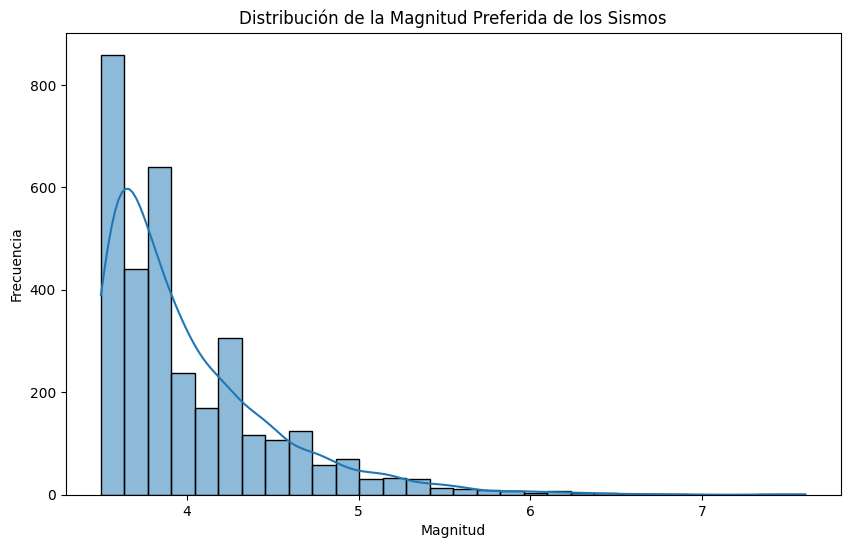

In [15]:
import matplotlib. pyplot as plt


plt.figure(figsize=(10,6))
sns.histplot(df['magnitude_value_P'], bins=30, kde=True)
plt.title("Distribución de la Magnitud Preferida de los Sismos")
plt.xlabel("Magnitud")
plt.ylabel("Frecuencia")
plt.show()




### Profundidad y magnitud

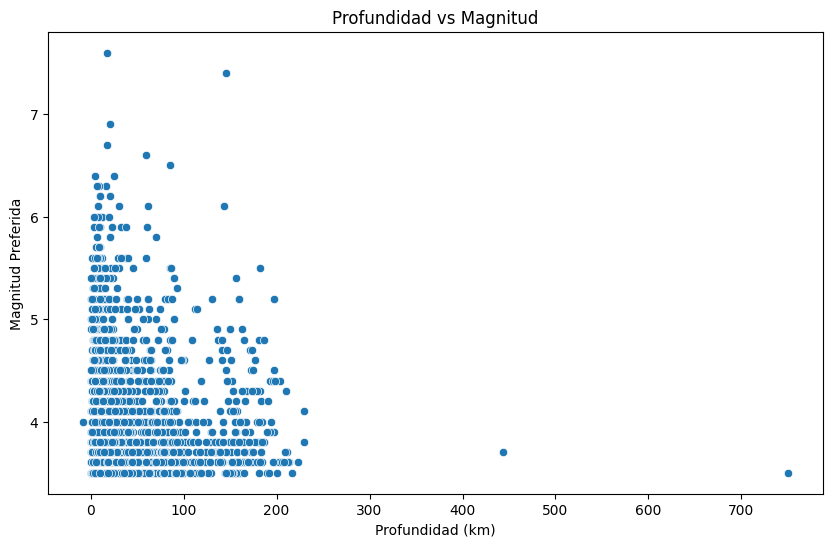

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='depth_value', y='magnitude_value_P', data=df)
plt.title("Profundidad vs Magnitud")
plt.xlabel("Profundidad (km)")
plt.ylabel("Magnitud Preferida")
plt.show()


### Mapa de eventos sismicos

In [17]:
fig = px.scatter_geo(df, lat='latitude_value', lon='longitude_value',
                     color='magnitude_value_P',
                     size='magnitude_value_P',
                     projection="natural earth",
                     title="Eventos Sísmicos en Ecuador (2012-2025)")
fig.show()


NameError: name 'px' is not defined